In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# path_accidents = 'dft-road-casualty-statistics-accident-1979-2020.csv'
# path_casualty = 'dft-road-casualty-statistics-casualty-1979-2020.csv'
# path_vehicle = 'dft-road-casualty-statistics-vehicle-1979-2020.csv'

In [ ]:
# !unzip /content/drive/MyDrive/vis_data.zip

Archive:  /content/drive/MyDrive/vis_data.zip
replace dft-road-casualty-statistics-vehicle-1979-2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
path_accidents_2020 = 'dft-road-casualty-statistics-accident-2020.csv'
path_casualty_2020 = 'dft-road-casualty-statistics-casualty-2020.csv'
path_vehicle_2020 = 'dft-road-casualty-statistics-vehicle-2020.csv'

In [ ]:
!unzip /content/drive/MyDrive/vis2020.zip

Archive:  /content/drive/MyDrive/vis2020.zip
  inflating: dft-road-casualty-statistics-vehicle-2020.csv  
  inflating: dft-road-casualty-statistics-accident-2020.csv  
  inflating: dft-road-casualty-statistics-casualty-2020.csv  


In [ ]:
path = '/content/'

In [ ]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib

In [ ]:
dfa20 = pd.read_csv(path + path_accidents_2020).set_index('accident_index')  
dfv20 = pd.read_csv(path + path_vehicle_2020).set_index('accident_index') 
dfc20 = pd.read_csv(path + path_casualty_2020).set_index('accident_index') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dfa20.columns, dfv20.columns, dfc20.columns

(Index(['accident_year', 'accident_reference', 'location_easting_osgr',
        'location_northing_osgr', 'longitude', 'latitude', 'police_force',
        'accident_severity', 'number_of_vehicles', 'number_of_casualties',
        'date', 'day_of_week', 'time', 'local_authority_district',
        'local_authority_ons_district', 'local_authority_highway',
        'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
        'junction_detail', 'junction_control', 'second_road_class',
        'second_road_number', 'pedestrian_crossing_human_control',
        'pedestrian_crossing_physical_facilities', 'light_conditions',
        'weather_conditions', 'road_surface_conditions',
        'special_conditions_at_site', 'carriageway_hazards',
        'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
        'trunk_road_flag', 'lsoa_of_accident_location'],
       dtype='object'),
 Index(['accident_year', 'accident_reference', 'vehicle_reference',
        'vehicle

In [ ]:
vnota = []
for i in dfv20.columns:
  if i not in dfa20.columns:
    vnota.append(i)

cnotav = []
for i in dfc20.columns:
  if i not in dfa20.columns:
    if i not in dfv20.columns:
      cnotav.append(i)

In [ ]:
dfvnota = dfv20[vnota].copy()
dfcnotav = dfc20[cnotav].copy()

In [ ]:
dfav = dfa20.copy().join(dfvnota)
df = dfav.copy().join(dfcnotav)

In [ ]:
# df

accident_year  ... casualty_imd_decile
accident_index                 ...                    
2020010219808            2020  ...                 NaN
2020010220496            2020  ...                 NaN
2020010228005            2020  ...                 NaN
2020010228006            2020  ...                 NaN
2020010228011            2020  ...                 NaN
...                       ...  ...                 ...
2020991027064            2020  ...                 2.0
2020991029573            2020  ...                10.0
2020991030297            2020  ...                 9.0
2020991030900            2020  ...                 9.0
2020991032575            2020  ...                 1.0

[211577 rows x 73 columns]

In [ ]:
df.columns

In [ ]:
df_place = df[['accident_year', 'accident_reference', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'vehicle_type', 'vehicle_manoeuvre', 'sex_of_driver', 'age_of_driver']].copy()

In [ ]:
profile = df_place.profile_report(html={"style": {"full_width": True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# profile.to_file("/content/drive/MyDrive/example.html")

In [ ]:
df_place.duplicated().describe()

count     211577
unique         2
top        False
freq      163347
dtype: object

In [ ]:
df_place.iloc[4099]

accident_year                 2020
accident_reference        10235329
longitude                -0.111264
latitude                   51.3684
police_force                     1
accident_severity                3
number_of_vehicles               3
number_of_casualties             3
date                    08/02/2020
day_of_week                      7
time                         14:00
vehicle_type                     9
vehicle_manoeuvre                4
sex_of_driver                    1
age_of_driver                   72
Name: 2020010235329, dtype: object

In [ ]:
df_place[['latitude', 'longitude']].describe()

latitude      longitude
count  211543.000000  211543.000000
mean       52.354212      -1.214459
std         1.281980       1.356695
min        49.970479      -7.497375
25%        51.455306      -2.122889
50%        51.890315      -1.137695
75%        53.334857      -0.138886
max        60.541144       1.756257

In [ ]:
def get_df_area (olddf, coordinates):
  df = olddf.copy()
  df = df[df['latitude'] <= coordinates[0]]
  df = df[df['latitude'] >= coordinates[1]]
  df = df[df['longitude'] >= coordinates[2]]
  df = df[df['longitude'] <= coordinates[3]]
  return df

In [ ]:
london_coordinates = [51.6274, 51.3718, -0.3035, 0.0810]
london_df = get_df_area(df_place, london_coordinates)

In [ ]:
london_df

accident_year accident_reference  ...  sex_of_driver  age_of_driver
accident_index                                    ...                              
2020010219808            2020           10219808  ...            2.0           32.0
2020010220496            2020           10220496  ...            1.0           45.0
2020010228005            2020           10228005  ...            3.0           -1.0
2020010228006            2020           10228006  ...            1.0           44.0
2020010228011            2020           10228011  ...            1.0           20.0
...                       ...                ...  ...            ...            ...
202048T251644            2020          48T251644  ...            2.0           27.0
202048T257811            2020          48T257811  ...            1.0           39.0
202048T257811            2020          48T257811  ...            1.0           35.0
202048T280437            2020          48T280437  ...            1.0           25.0
202048T280437            2020          48T280437  ...            1.0           34.0

[29296 rows x 15 columns]

In [ ]:
BBox = (london_df.longitude.min(),   london_df.longitude.max(),      
         london_df.latitude.min(), london_df.latitude.max())
BBox

(-0.303498, 0.080864, 51.371806, 51.627354)

In [ ]:
ruh_m = plt.imread('/content/map.png')

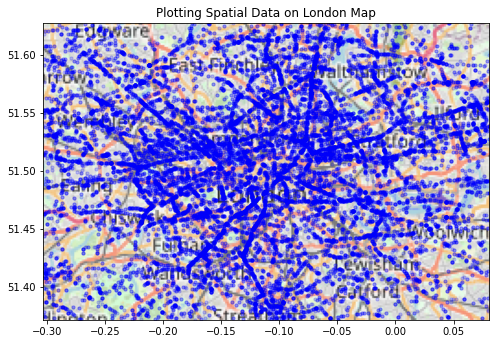

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(london_df['longitude'], london_df['latitude'], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on London Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

fig